In [1]:
import sys
sys.path.append('../../')

import torch as tc
import matplotlib.pyplot as plt
import matplotlib

from rcgp.rcgp import IMQ_and_gradient

In [2]:
ymin, ymax = -10, 10
Y = tc.linspace(ymin, ymax, 1000)
m = tc.zeros_like(Y)
imq_out, imq_grad_out = IMQ_and_gradient(Y=Y, m=m, beta=1, c=1)

Text(0, 0.5, '$w_{\\small \\textrm{IMQ}} (\\mathbf{x}_k, y)$')

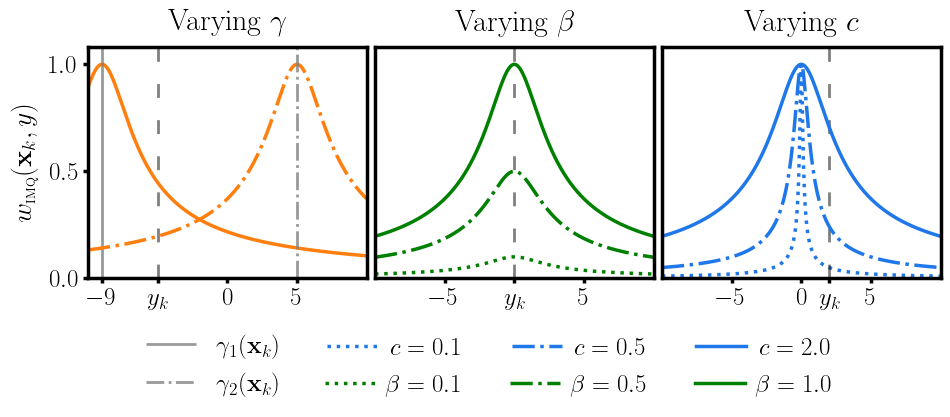

In [3]:
plt.rc('font', family='serif', size=18)
plt.rcParams['text.usetex'] = True
matplotlib.rcParams['lines.linewidth'] = 2.5

lcolor, xcolor = "#1f77e9", "#ff7f0e"

ylinestyle = (0, (5, 8))
vline_alpha=0.4
vline_wdith = 2.
wmin, wmax=0, 1.08

fig, axs = plt.subplots(1, 3, figsize=(11,3), sharey=True)

#First plot
for offset, linestyle, sub in zip([-9., 5.], ['-', '-.'], [1, 2]):
    imq_out, imq_grad_out = IMQ_and_gradient(Y=Y, m=m + tc.tensor(offset), beta=1.0, c=2.0)
    axs[0].plot(Y, imq_out, linestyle=linestyle, color=xcolor)

    if sub==1:
        label=r'$\gamma_{1}(\mathbf{x}_k)$'
    else:
        label=r'$\gamma_{2}(\mathbf{x}_k)$'

    axs[0].vlines(x=offset, ymin=wmin, ymax=wmax, linestyle=linestyle, color='gray', alpha=2*vline_alpha, linewidth=vline_wdith, label=label)
    if sub==1:
        axs[0].vlines(x=-5, ymin=wmin, ymax=wmax, color='black', alpha=0.5, linestyle=ylinestyle, linewidth=2.)


axs[0].set_xticks([-9, -5, 0, 5])

labels = [item.get_text() for item in axs[0].get_xticklabels()]


labels[1] = r'$y_k$'

axs[0].set_xticklabels(labels)


#Second plot
for beta_val, linestyle in zip([0.1, 0.5, 1.], ['dotted', '-.', '-']):
    imq_out, imq_grad_out = IMQ_and_gradient(Y=Y, m=m, beta=beta_val, c=2.0)
    axs[1].plot(Y, imq_out, linestyle=linestyle, color="green", label=r"$\beta={}$".format(beta_val))

    if beta_val==0.1:
        axs[1].vlines(x=0, ymin=wmin, ymax=wmax, color='black', alpha=0.5, linestyle=ylinestyle, linewidth=2.)



axs[1].set_xticks([-5, 0, 5])

labels = [item.get_text() for item in axs[1].get_xticklabels()]
labels[1] = r'$y_k$'
axs[1].set_xticklabels(labels)




#Third plot
for c_val, linestyle in zip([0.1, 0.5, 2.], ['dotted', '-.', '-']):
    imq_out, imq_grad_out = IMQ_and_gradient(Y=Y, m=m, beta=1, c=c_val)
    axs[2].plot(Y, imq_out, linestyle=linestyle, color=lcolor, label=r"$c={}$".format(c_val))

    if c_val==0.1:
        axs[2].vlines(x=2, ymin=wmin, ymax=wmax, color='black', alpha=0.5, linestyle=ylinestyle, linewidth=2.)


axs[2].set_xticks([-5, 0, 2, 5])

labels = [item.get_text() for item in axs[2].get_xticklabels()]
labels[2] = r'$y_k$'

axs[2].set_xticklabels(labels)


for ax in axs:
    ax.set_xlim(ymin, ymax)
    ax.set_ylim(wmin, wmax)

for ax in axs.flat:
    # Set linewidth for all spines of each axis
    for spine in ax.spines.values():
        spine.set_linewidth(2.5) 
    ax.tick_params(width=2.5)

fig.subplots_adjust(wspace=0.03)

for ax in axs[1:]:
    ax.tick_params(left=False)


axs[0].legend(loc="upper center", bbox_to_anchor=(0.45, -0.225+0.08), ncols=1, fontsize=18, frameon=False)
axs[1].legend(loc="upper center", bbox_to_anchor=(0.72+0.01, -0.4+0.08), ncols=3, fontsize=18, frameon=False, columnspacing=1.94, handletextpad=0.4) #green
axs[2].legend(loc="upper center", bbox_to_anchor=(-0.308+0.01, -0.24+0.08), ncol=3, fontsize=18, frameon=False, handletextpad=0.5) #blue

axs[0].set_title(r"Varying $\gamma$", pad=12)
axs[1].set_title(r"Varying $\beta$", pad=12)
axs[2].set_title(r"Varying $c$", pad=12)


axs[0].set_ylabel(r"$w_{\small \textrm{IMQ}} (\mathbf{x}_k, y)$", fontsize=20, labelpad=8)


#fig.savefig("./varying-params-IMQ-weight-fct.pdf", format='pdf', bbox_inches='tight')